In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import os


%pylab inline
#import datetime
#from datetime import datetime
#import matplotlib.dates as mdates


Populating the interactive namespace from numpy and matplotlib


### Idea:
Male's and female's trip duration times are different.

To test this idea, the data for the month of July of 2017 will be used. 
The results of the test will be applicable to this month only. 
Also, since the data may have dispersion and outliers, only the trips last 45 minutes or less would be considered (also, 45 minutes is the allowable time for city bike users with a year pass). 

### Testable Hypothesis:
Male's and female's average trip time duration are significant different.

### Null Hypothesis :
Male's and female's average trip time duration are equal.

The test will be conducted with an alpha=0.05

H0: Triptime(Female)=Triptime(Male)
H1: Triptime(Female)<>Triptime(Male)


In [2]:
#Getting the data from url 
#A file will be downloaded to the current user folder and open directly from there. 

!wget -o - "https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip"

df=pd.read_csv("JC-201707-citibike-tripdata.csv.zip")


In [3]:
#Here we visualize the first rows of the data set
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


In [4]:
#Since we are only interested in gender and tripduration, we create a new df, (df_r) that contains only the variables of interest.
df_r=df[[ 'tripduration', "gender"]]

df_r.head()


,tripduration,gender
0,340,2
1,439,1
2,186,1
3,442,1
4,170,1


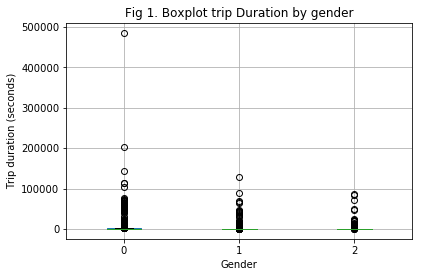

In [5]:
#here we do a visualization of the original database 
df_r.boxplot(column="tripduration",by='gender')

xlabel("Gender")
ylabel("Trip duration (seconds)")
title("Fig 1. Boxplot trip Duration by gender")
suptitle("");

Figure 1. 
We can see that there are lot of outliers.
We proceed to strip the trip durations greater than 45 minutes.

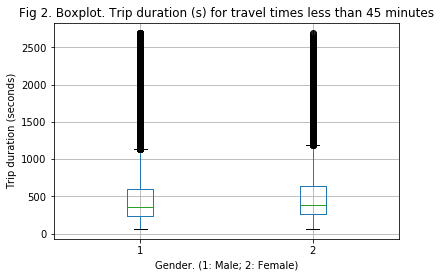

In [6]:
#Here we strip the durations greater than 45 minutes
#We also remove variables of the "unkown" gender

df_r=df_r[df_r["tripduration"]<=2700] #this removes the times greater than 2700 (45 minutes) 

df_g=df_r[df_r["gender"]>0] #we create a new data frame with only the values for gender of 1 (male) and 2 (female)


df_g.boxplot(column="tripduration",by='gender')
xlabel("Gender. (1: Male; 2: Female)")
ylabel("Trip duration (seconds)")
title("Fig 2. Boxplot. Trip duration (s) for travel times less than 45 minutes")
suptitle("");


Figure 2. There're still a lot outliers, but at least is visible

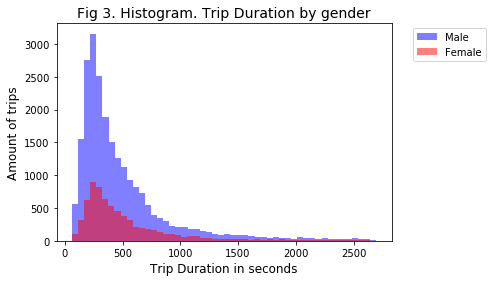

In [68]:
#Another type of visualization. 
hist((df_r[df_r["gender"]==1]["tripduration"]), bins = 50,label = "Male", color="blue", alpha=0.5)
hist((df_r[df_r["gender"]==2]["tripduration"]), bins = 50, label = "Female", color="red", alpha=0.5)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.xlim()
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Fig 3. Histogram. Trip Duration by gender", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);